# Logistic Regression
## contents
### 1. Problem formulation and expected result
### 2. Preparation
#### 2.1. Load packages and settings
#### 2.2. Load data
### 3. Data inspection and data cleaning
#### 3.1. Basic data inspect
#### 3.2. Check null values and fix them
#### 3.3. Inspect relationships, distributions and outliers of numerical data
#### 3.4. Inspect relationships, distributions and outliers of categorical data
#### 3.5. investigate the distribution of y
### 4. Data processing
#### 4.1. Convert categorical variables to numerical representation
#### 4.2. Select importance variables by Feature importance 
#### 4.3. splitting the data
### 5. Build logistic regression model
#### 5.1. Define, fit, predict
#### 5.2. Validate 
#### 5.3. Improve model by parametertuning
##### 5.3.1. select the best c parameter by looping through a list of c
##### 5.3.2. select the best c parameter by LogisticRegressionCV
#### 5.4. Update the model using the best method









## 1. Problem formulation and expected result
### based on the customer data, 
### a. what are the factors that can tell if a loan is good or bad?
#### to show clients what to improve to get the loan
### b. predict whether the loan of a customer should be approved (if the loan is good or bad).
#### to automate the loan approval process for a bank or loan p2p platform

## 2. Preparation
### 2.1.  Load packages and settings

In [1]:
#load packages
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

In [2]:
#set the plot size
sns.set(rc = {'figure.figsize':(12,10)})

In [3]:
#see all columns
pd.set_option('display.max_columns', None)

In [4]:
#change scientific numbers to float
np.set_printoptions(formatter = {'float_kind':'{:f}'.format})

In [5]:
# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 2.2. Load data

In [6]:
raw_data = pd.read_csv('/Users/juli/Desktop/ML/people.csv')

## 3. Data inspection and data cleaning
### 3.1. Basic data inspect

In [7]:
#check the first 5 rows
raw_data.head()

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116.0,0-200,5-7 Years,Male,No,Property - Real Estate,47.0,House Owner,Services,No,No
1,No Data,critical,TV,2438.0,No Data,7+ Years,Male,No,Savings Account,52.0,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144.0,0-200,2-5 Years,Male,No,Vehicle,48.0,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073.0,No Data,2-5 Years,Married,No,Vehicle,25.0,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276.0,No Data,7+ Years,Male,No,No Security,59.0,Renting,Services,No,No


In [8]:
#check the amount of rows and columns
raw_data.shape

(1006, 14)

In [9]:
# check the unique values in each column
for col in raw_data:
    print(col)
    print(raw_data[col].unique())
    print(len(raw_data[col].unique()))
    print('\n')

Type of Account
['No Data' 'Type A' 'Type B' 'Type C' nan]
5


Account History
['critical' 'Average (known delays)' 'Good' nan]
4


Reason for the Loan
['Learning / Edu purposes' 'TV' 'Buying a New Car' 'Home furniture'
 'Support for Business' 'Buying a Used Car' 'Renovation' 'All other'
 'Home Devices' 'Advance Edu/training' nan]
11


Loan Amount
[2116.000000 2438.000000 2144.000000 2073.000000 1276.000000 6130.000000
 1394.000000 7242.000000 9581.000000 734.000000 1421.000000 621.000000
 816.000000 2017.000000 7873.000000 3579.000000 3869.000000 1259.000000
 2289.000000 699.000000 1595.000000 1917.000000 2875.000000 1071.000000
 3785.000000 1377.000000 950.000000 1511.000000 1954.000000 3080.000000
 3359.000000 1554.000000 1295.000000 1189.000000 727.000000 2694.000000
 1172.000000 2750.000000 1235.000000 6324.000000 1403.000000 2409.000000
 3373.000000 1525.000000 7643.000000 10141.000000 711.000000 1046.000000
 5819.000000 1873.000000 11596.000000 1464.000000 3234.000000 2351.00000

##### only loan and age are numerical, others are categorical

### 3.2. Check null values and fix them

In [10]:
#check null values
raw_data.isnull().sum()

Type of Account          2
Account History          2
Reason for the Loan      3
Loan Amount              3
Account Savings          4
Employment History       5
Individual Stauts        5
Other Loans              5
Security / Collateral    5
Age                      4
Residence Status         4
Job                      4
Completed Other loan?    4
Good Loan                5
dtype: int64

In [11]:
# check the null value situation by inspecting the column with the most null value first
raw_data[raw_data['Employment History'].isnull()]

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
686,Type C,Good,Buying a New Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,Type C,critical,Home furniture,5387.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
737,Type C,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,House Owner,Services,No,NaN
1005,NaN,NaN,NaN,1765.0,0-201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# all rows are almost whole-null-world, so they can be deleted
raw_data = raw_data.dropna(subset = ['Employment History'])

raw_data.isnull().sum()
# the rows with null data are that 5 rows

Type of Account          0
Account History          0
Reason for the Loan      0
Loan Amount              0
Account Savings          0
Employment History       0
Individual Stauts        0
Other Loans              0
Security / Collateral    0
Age                      0
Residence Status         0
Job                      0
Completed Other loan?    0
Good Loan                0
dtype: int64

### 3.3. Inspect relationships, distributions and outliers of numerical data

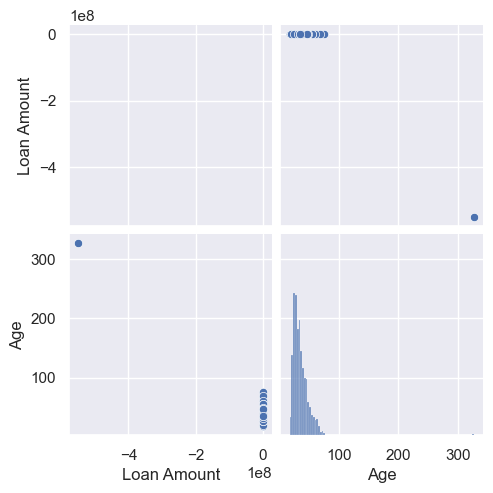

In [13]:
# pairplot
g = sns.pairplot(raw_data)

In [15]:
# check out the outliers
raw_data[raw_data["Age"] > 100]

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
679,Type C,Good,Home furniture,-548541254.0,No Data,Unemployed,Female_,No,Vehicle,327.0,House Owner,Skilled Labor,Yes,Yes


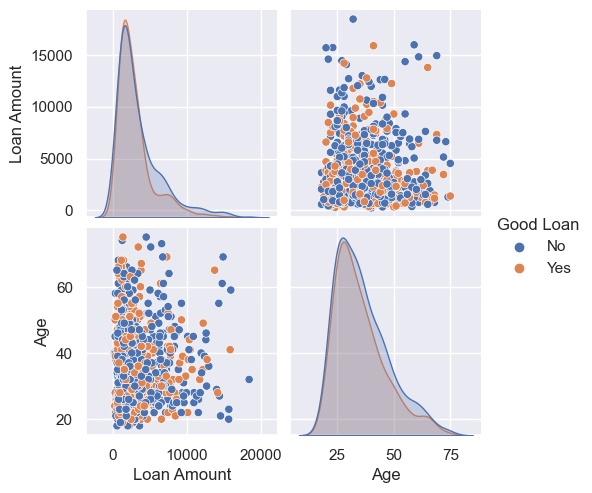

In [16]:
# delete the outlier
raw_data = raw_data[raw_data["Age"] < 100]

# check out the pairplot again
g = sns.pairplot(raw_data, hue = 'Good Loan')

### 3.4. Inspect relationships, distributions and outliers of categorical data

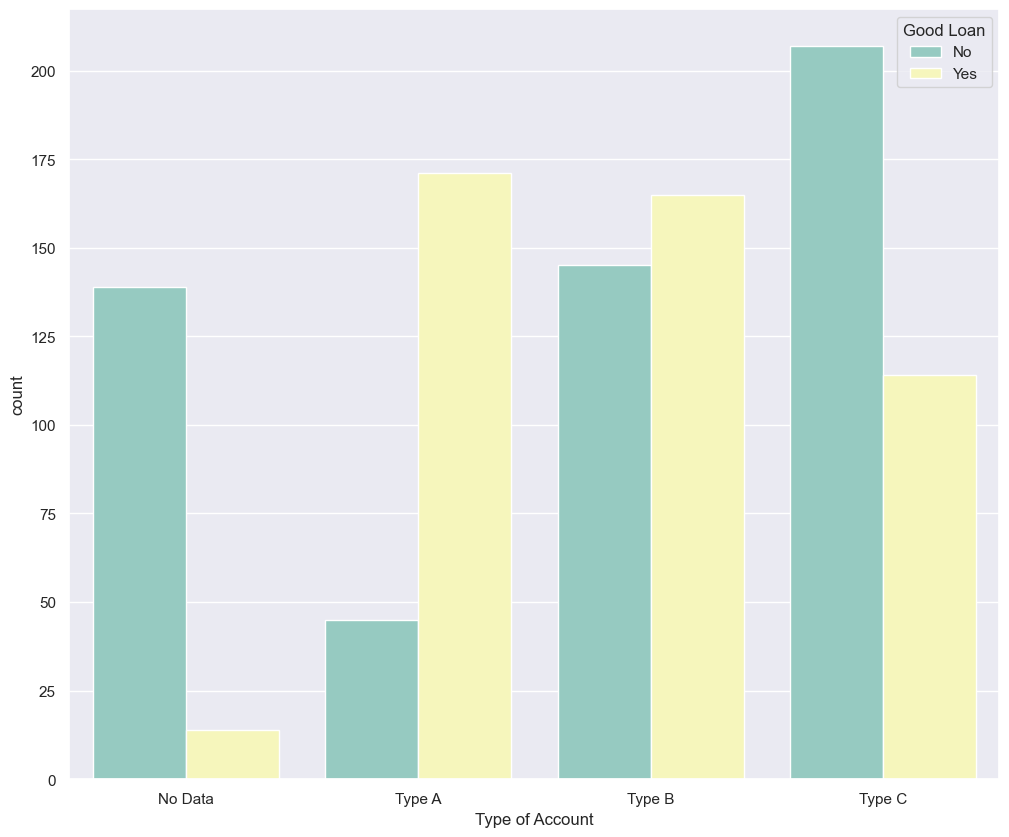

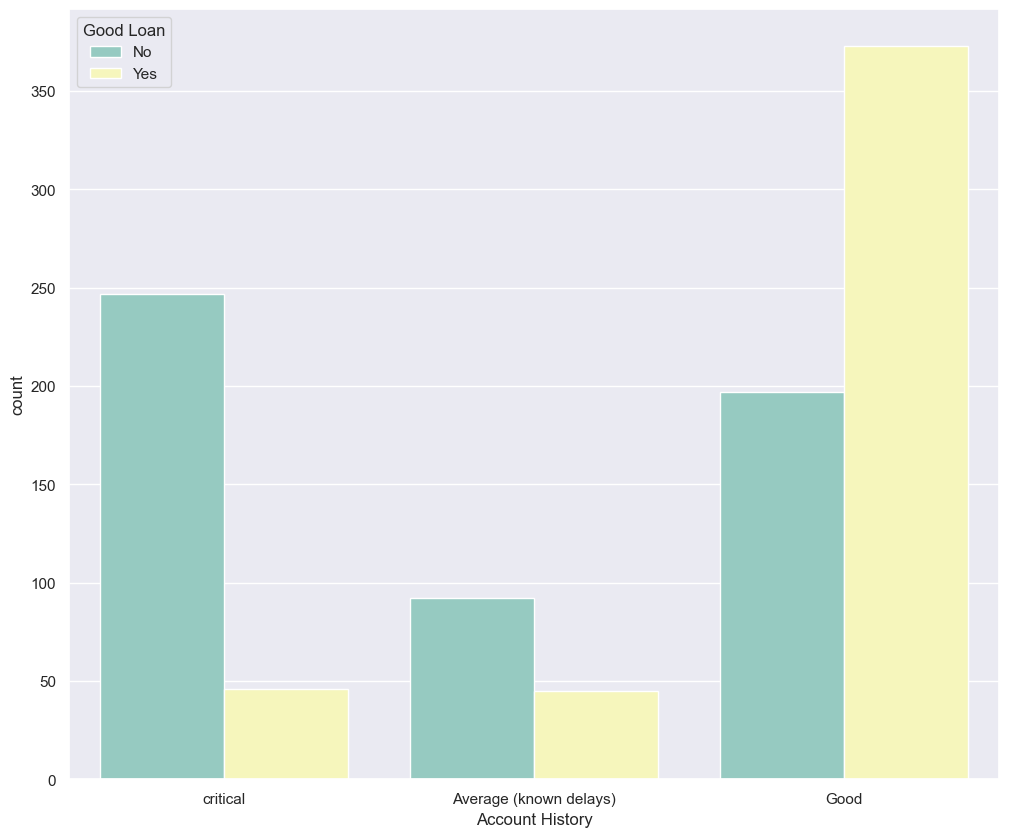

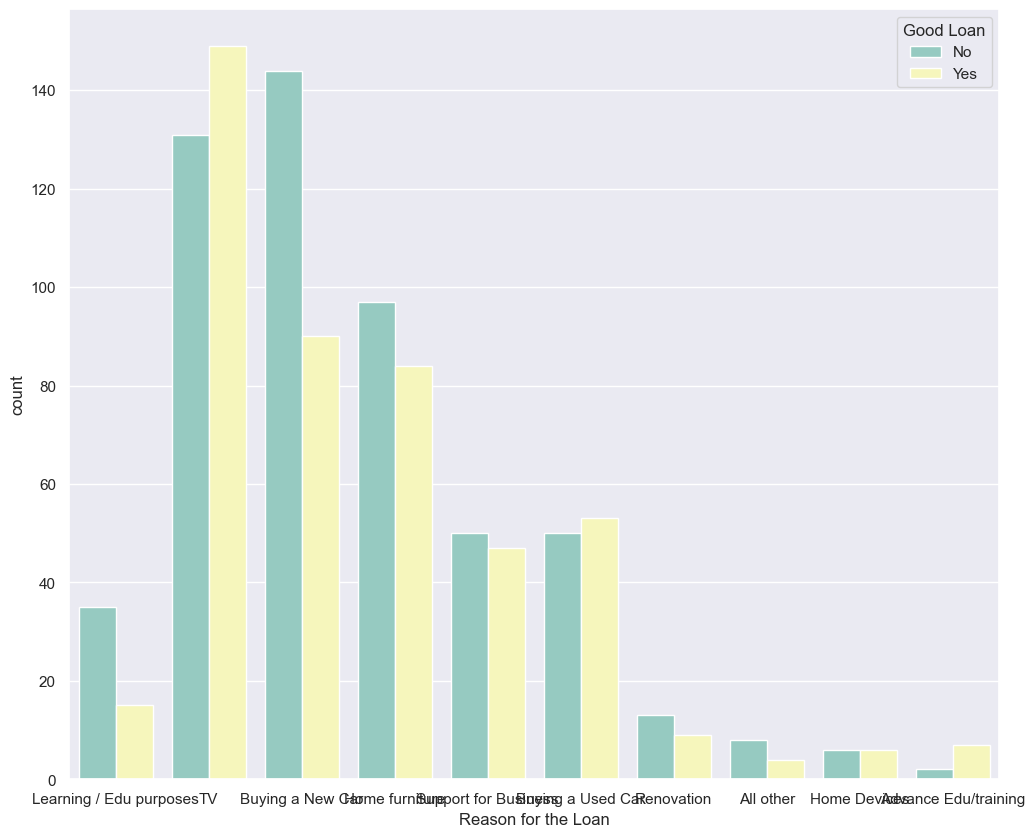

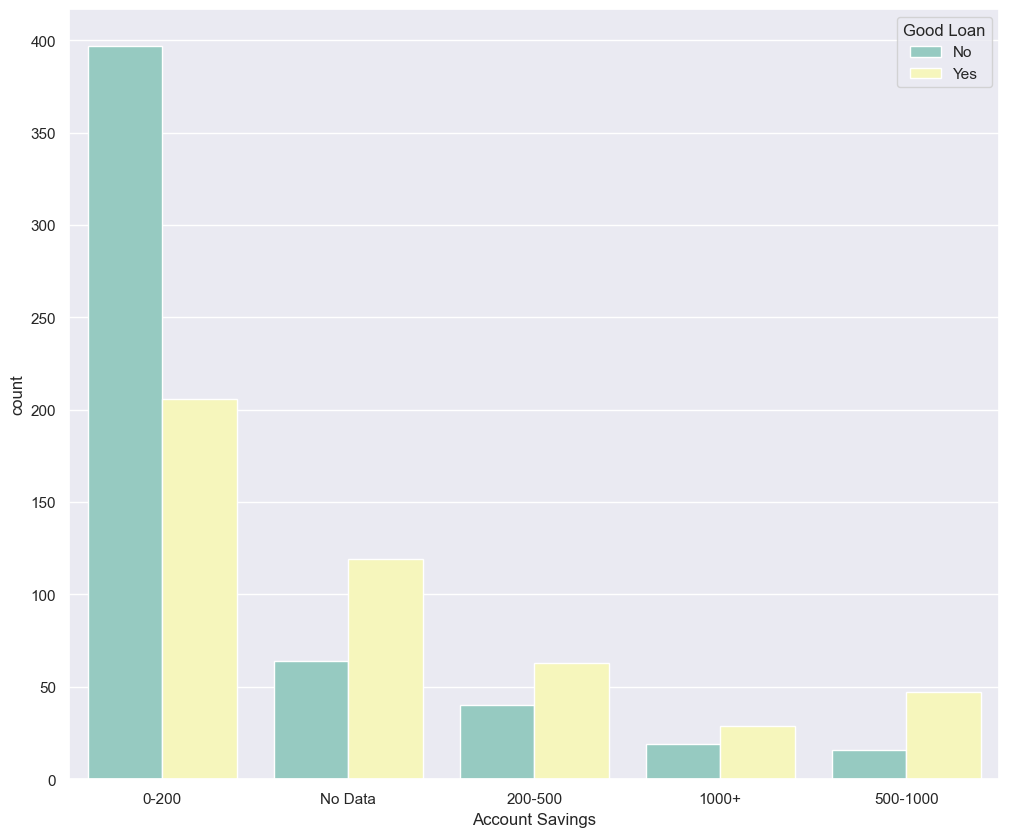

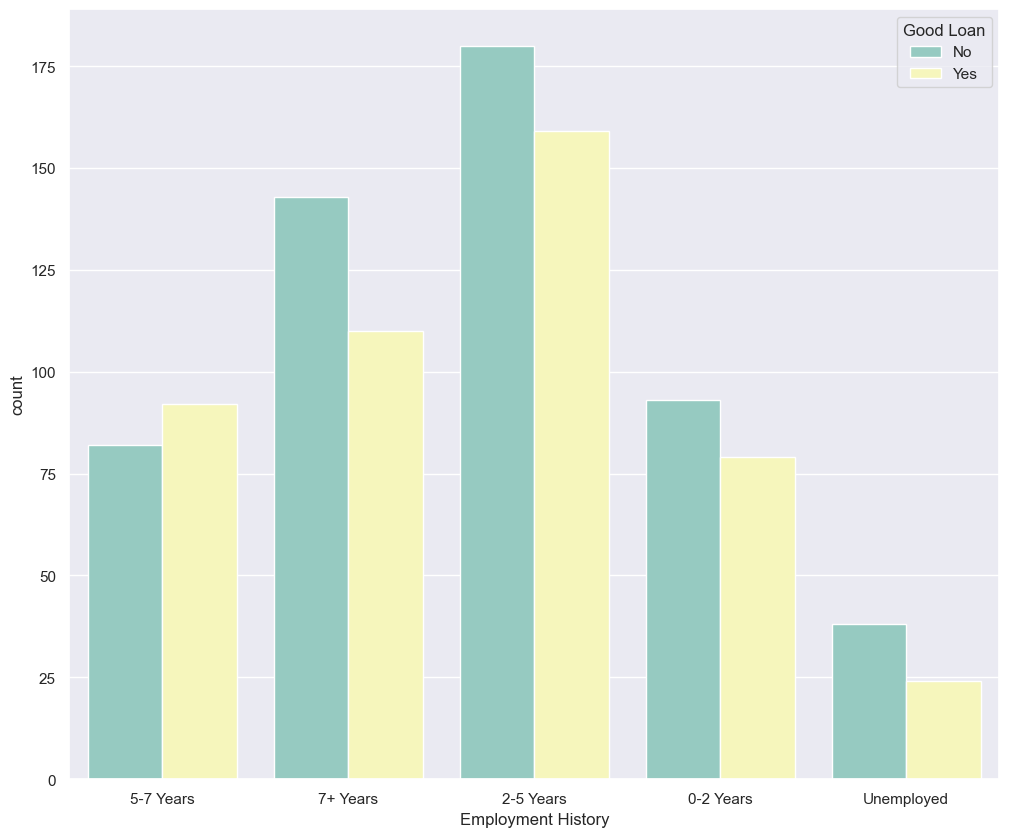

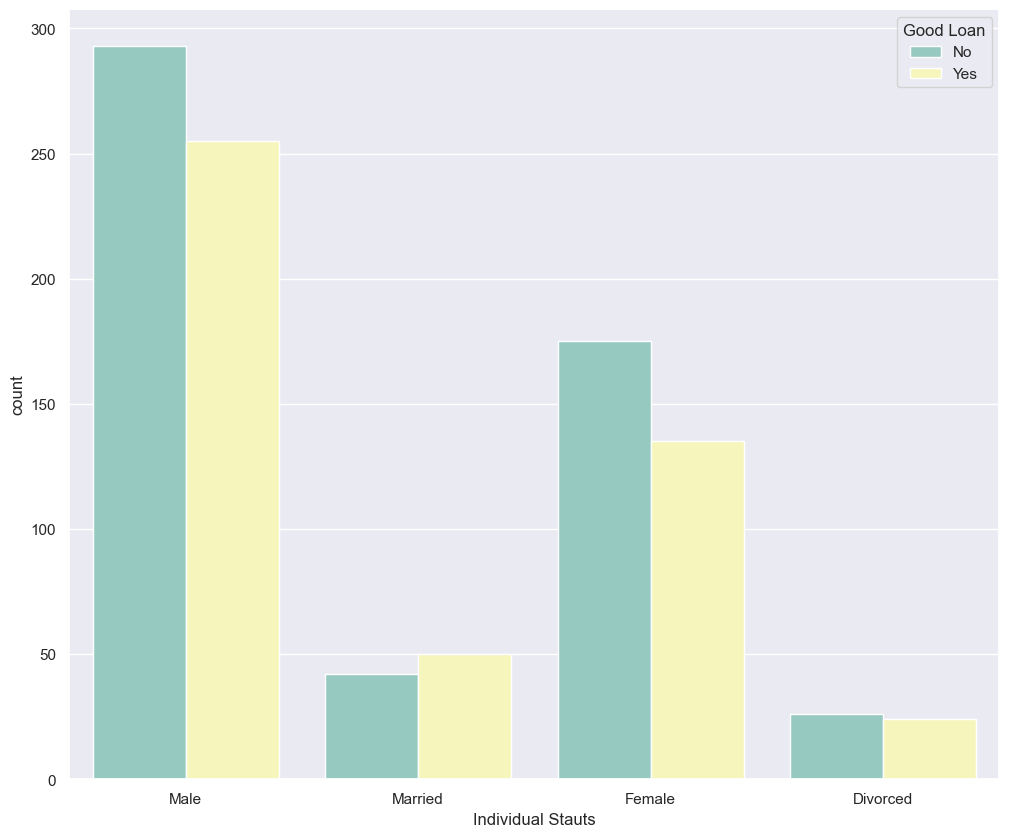

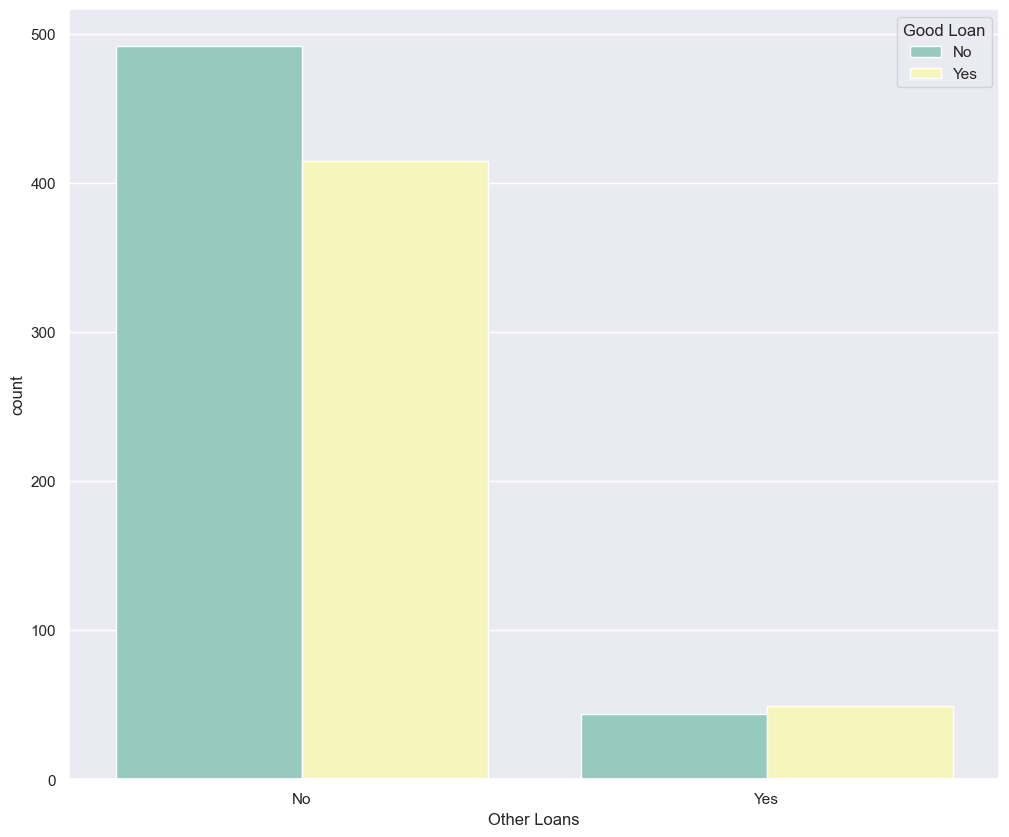

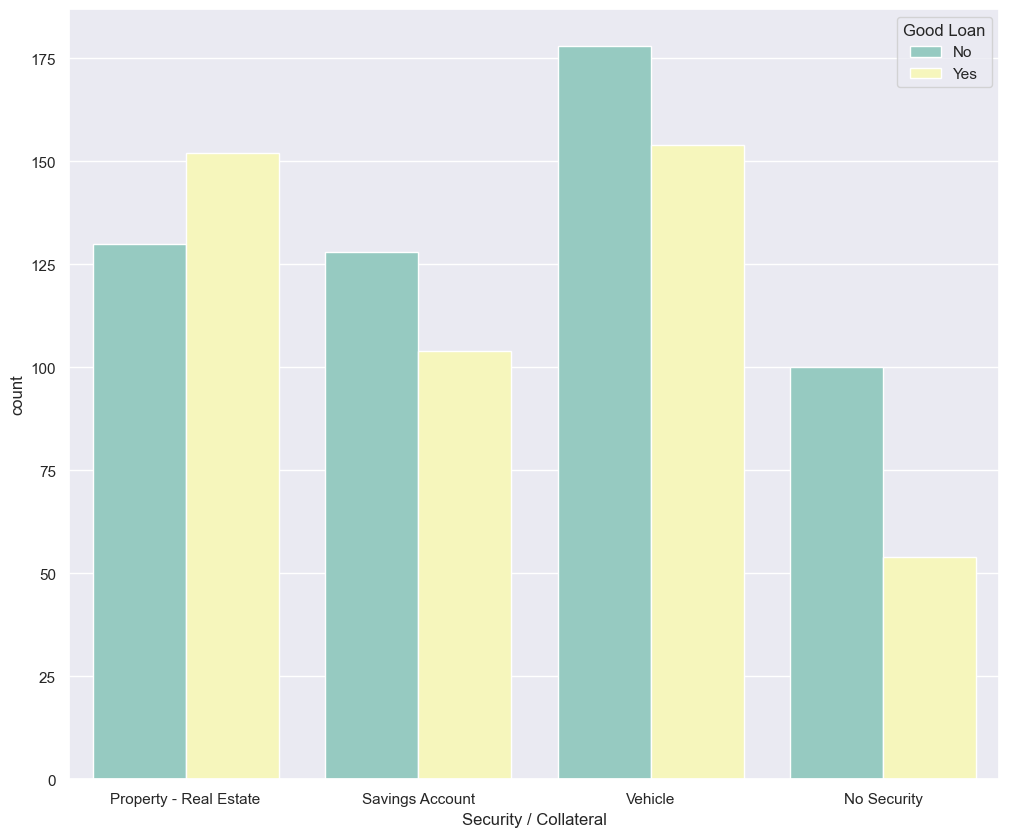

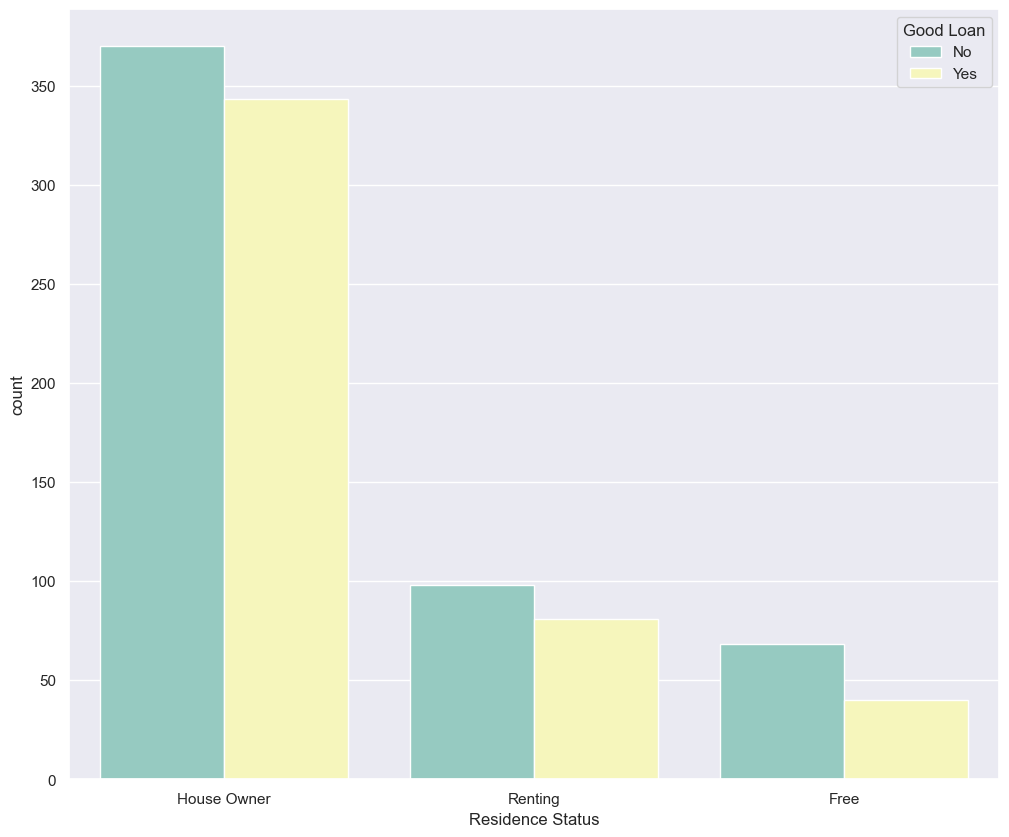

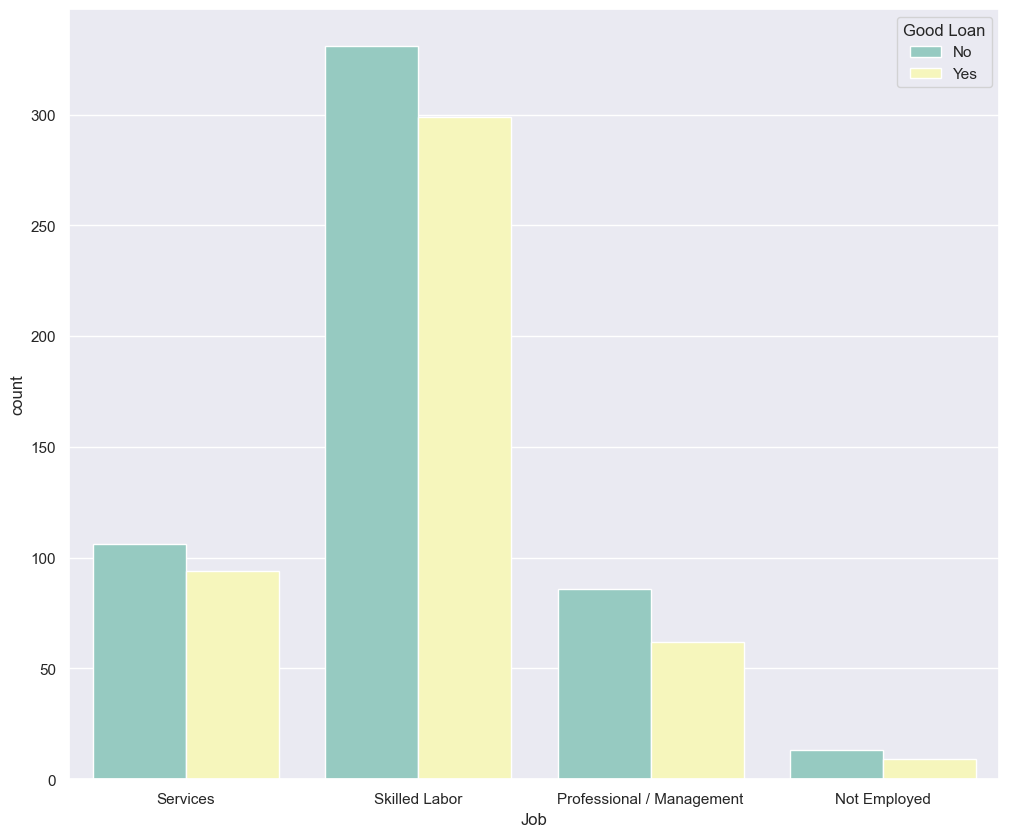

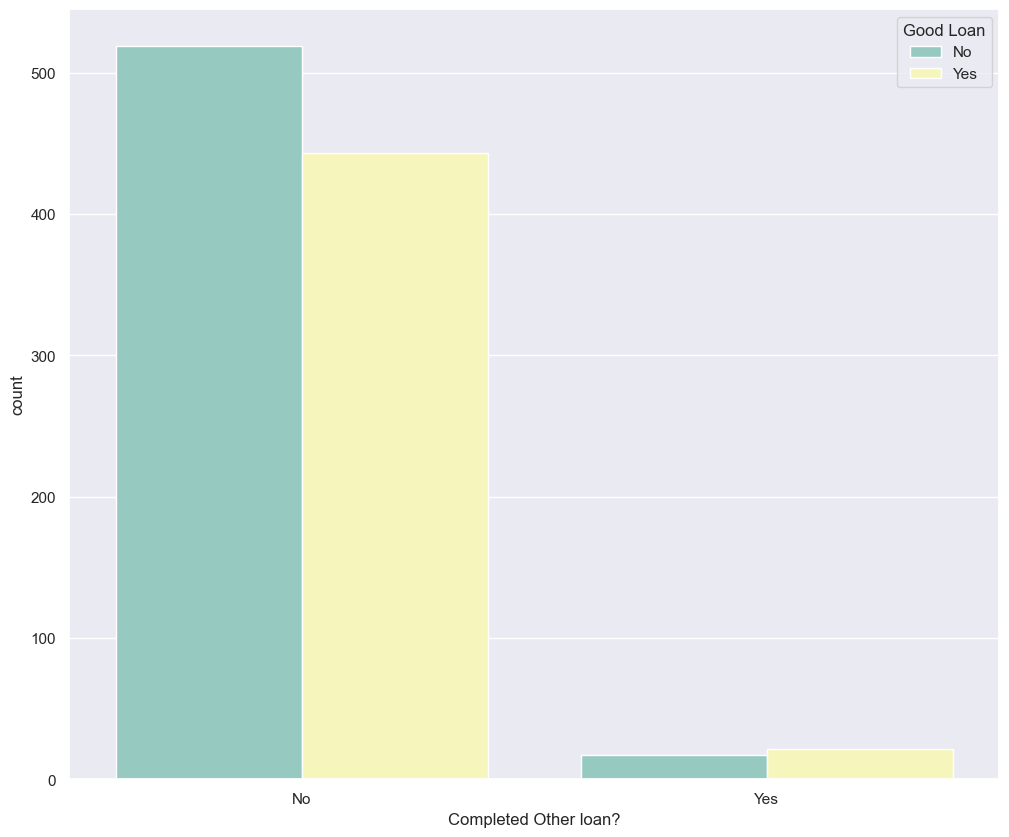

In [17]:
# Loop through all the categorical variables v.s. y
features = ['Type of Account', 'Account History', 'Reason for the Loan',
       'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral',
       'Residence Status', 'Job', 'Completed Other loan?']

for f in features:
    sns.countplot(x = f, data = raw_data, palette = 'Set3', hue = 'Good Loan')
    plt.show()

### 3.5. investigate the distribution of y

<AxesSubplot:xlabel='Good Loan', ylabel='count'>

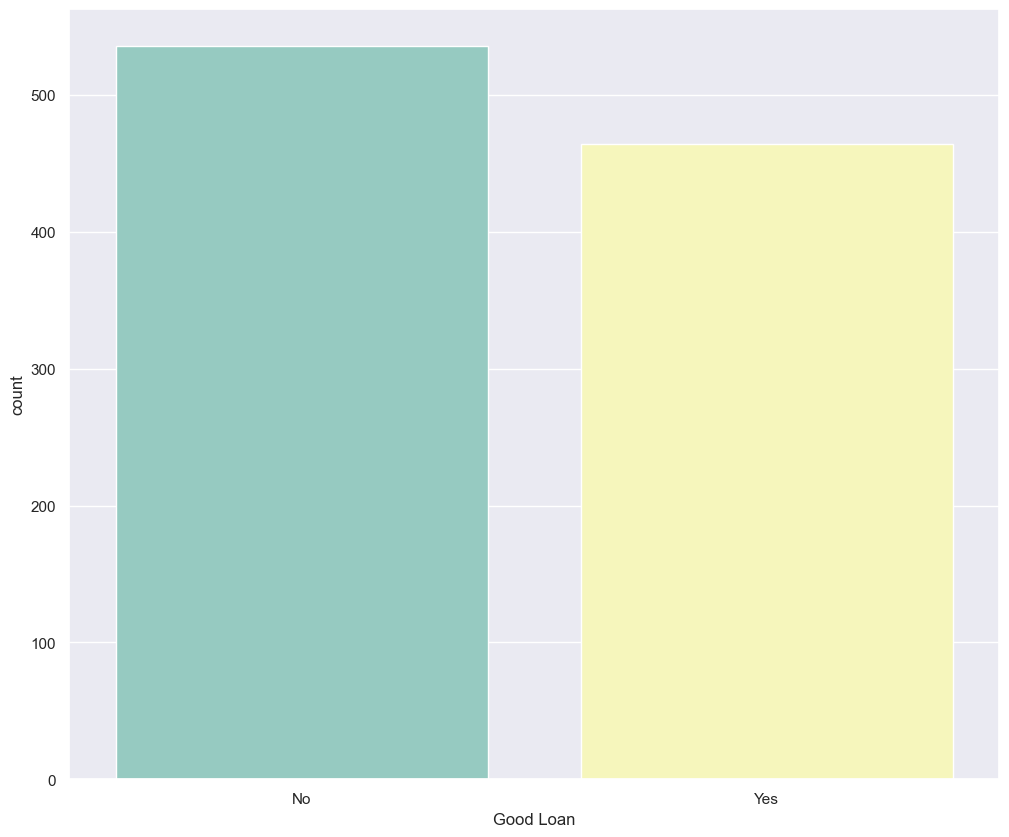

In [18]:
# investgate the distribution of y
sns.countplot(x = "Good Loan", data = raw_data, palette = "Set3")

##### count of good and bad loan are not far from each other, so it's balanced and there's no need to balance it

## 4. Data processing
### 4.1. convert categorical variables to numerical representation

In [19]:
# for categorical data except for y
new_raw_data = pd.get_dummies(raw_data, columns = features)

# for y
new_raw_data['Good Loan'][new_raw_data['Good Loan'] == 'Yes'] = 1
new_raw_data['Good Loan'][new_raw_data['Good Loan'] == 'No'] = 0

# check out the data
new_raw_data

/var/folders/y6/bjkjgw9x31dc7v_jspxtz9sw0000gn/T/ipykernel_40446/1513861998.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['Good Loan'][new_raw_data['Good Loan'] == 'Yes'] = 1
/var/folders/y6/bjkjgw9x31dc7v_jspxtz9sw0000gn/T/ipykernel_40446/1513861998.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data['Good Loan'][new_raw_data['Good Loan'] == 'No'] = 0


,Loan Amount,Age,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,Reason for the Loan_Advance Edu/training,Reason for the Loan_All other,Reason for the Loan_Buying a New Car,Reason for the Loan_Buying a Used Car,Reason for the Loan_Home Devices,Reason for the Loan_Home furniture,Reason for the Loan_Learning / Edu purposes,Reason for the Loan_Renovation,Reason for the Loan_Support for Business,Reason for the Loan_TV,Account Savings_0-200,Account Savings_1000+,Account Savings_200-500,Account Savings_500-1000,Account Savings_No Data,Employment History_0-2 Years,Employment History_2-5 Years,Employment History_5-7 Years,Employment History_7+ Years,Employment History_Unemployed,Individual Stauts_Divorced,Individual Stauts_Female,Individual Stauts_Male,Individual Stauts_Married,Other Loans_No,Other Loans_Yes,Security / Collateral_No Security,Security / Collateral_Property - Real Estate,Security / Collateral_Savings Account,Security / Collateral_Vehicle,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,2116.0,47.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0
1,2438.0,52.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0
2,2144.0,48.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0
3,2073.0,25.0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1
4,1276.0,59.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,3602.0,47.0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
1000,4473.0,35.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0
1001,12759.0,38.0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0
1002,2551.0,47.0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0


### 4.2. Select importance variables by Feature importance

In [20]:
#check the importance of each variables (score per variable for how much the variable influcences the prediction)
#set x and y
X = new_raw_data.drop(['Good Loan'], axis = 1).values
y = new_raw_data['Good Loan'].astype(int)
print(X.shape)
print(y.shape)

(1000, 48)
(1000,)


In [21]:
#tree based estimators, for example decision tree
dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [23]:
#check feature importance of each column and make a dataframe
fi_col = []
fi = []

for i, column in enumerate(new_raw_data.drop('Good Loan', axis=1)):    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

# create a dataframe for it
fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature', 'Feature Importance']).sort_values('Feature Importance', ascending = False).reset_index()            
fi_df

,index,Feature,Feature Importance
0,19,Account Savings_0-200,0.197515
1,7,Account History_Good,0.191316
2,0,Loan Amount,0.121221
3,1,Age,0.079630
4,2,Type of Account_No Data,0.054236
5,3,Type of Account_Type A,0.049733
6,5,Type of Account_Type C,0.026698
7,45,Job_Skilled Labor,0.020597
8,34,Other Loans_Yes,0.017520
9,23,Account Savings_No Data,0.016471


In [24]:
# keep the important ones for later (delete the ones with 0 feature importance)
columns_to_keep = fi_df['Feature'][0:40]

### 4.3. splitting the data

In [25]:
X = new_raw_data[columns_to_keep].values
y = new_raw_data['Good Loan'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 15)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size = 0.1, random_state = 15)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(720, 40)
(200, 40)
(80, 40)
(720,)
(200,)
(80,)


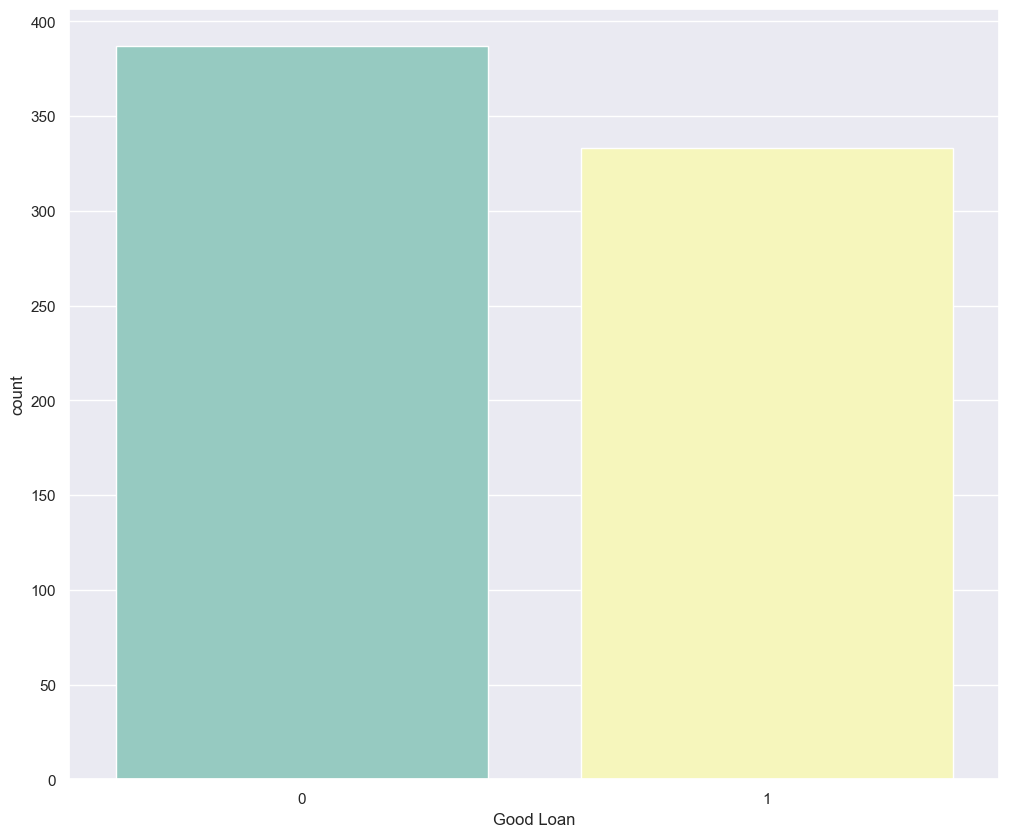

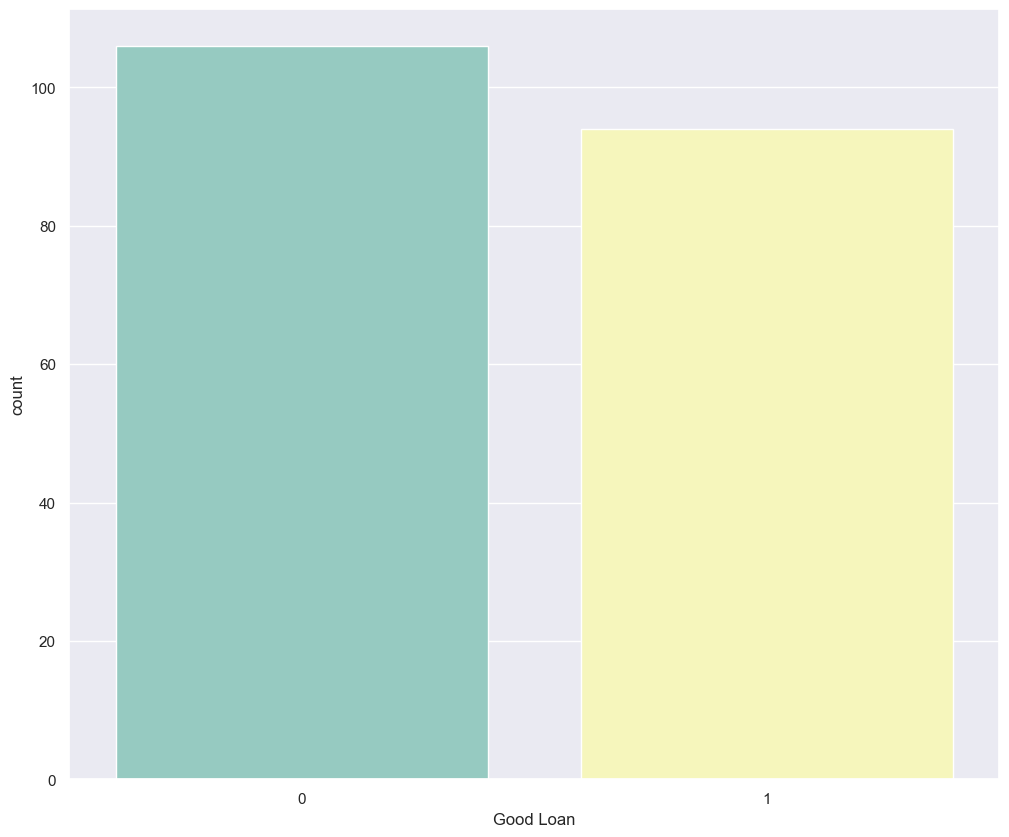

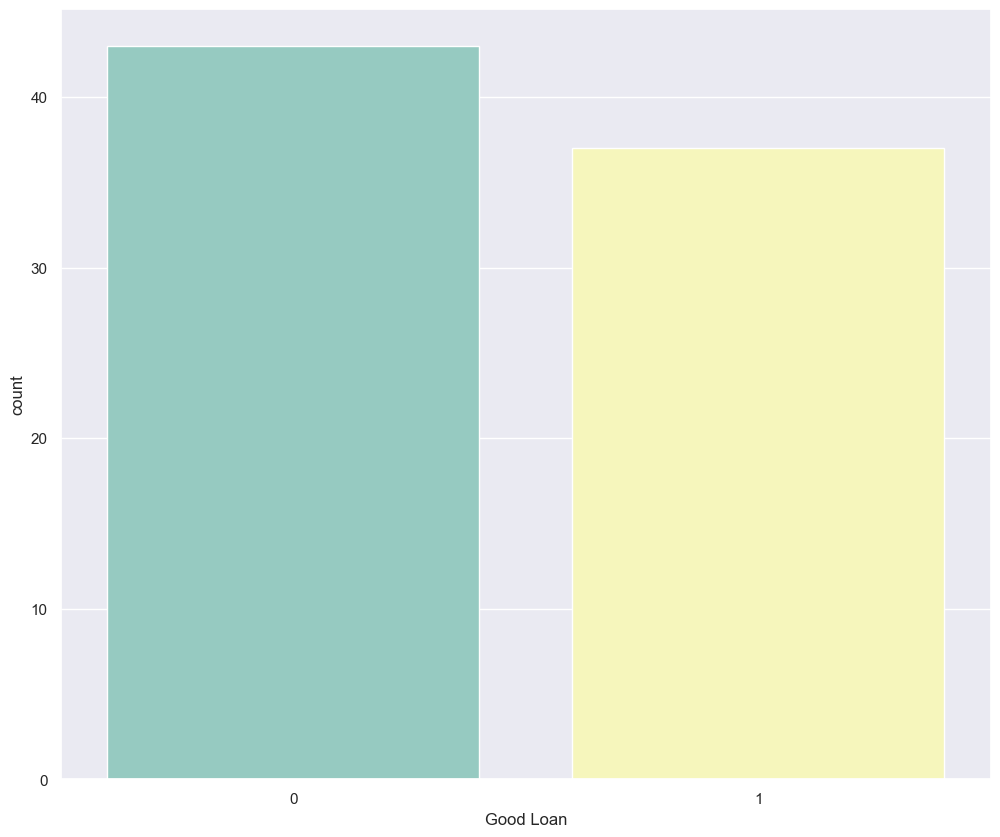

In [29]:
# make sure all the y subsets are balanced distributed
y = [y_train, y_test, y_valid]
for y in y:
    sns.countplot(x = y, palette = 'Set3')
    plt.show()

##### none of the subsets are unbalanced

## 5. Build logistic regression model
### 5.1. Define, fit, predict

In [30]:
#define the model
log_reg = LogisticRegression(random_state = 10, solver = 'lbfgs')

#fit the model
log_reg.fit(X_train, y_train)

#predict
y_pred = log_reg.predict(X_train)

# predict probability of y being more like 0 or 1
pred_proba = log_reg.predict_proba(X_train)

### 5.2. Validate 

In [31]:
# accuracy on train data as benchmark
print('The accuracy on the train data is: ', log_reg.score(X_train, y_train))

# accuracy on test data 
print('The accuracy on the test data is: ', log_reg.score(X_test, y_test))

# classification report
print(classification_report(y_train, y_pred))



The accuracy on the train data is:  0.7791666666666667
The accuracy on the test data is:  0.75
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       387
           1       0.77      0.75      0.76       333

    accuracy                           0.78       720
   macro avg       0.78      0.78      0.78       720
weighted avg       0.78      0.78      0.78       720



In [32]:
# log loss
# Log loss on train data
print("The Log Loss on Train data is: ", log_loss(y_train, pred_proba))

# Log loss on test data
pred_proba_t = log_reg.predict_proba(X_test)
print("The Log Loss on Test data is: ", log_loss(y_test, pred_proba_t))

The Log Loss on Train data is:  0.456121846912965
The Log Loss on Test data is:  0.49358753584285886


### 5.3. Improve model by parametertuning
##### look for the c parameter that has the lowest log loss and the highest accuracy
#### 5.3.1. select the best c parameter by looping through a list of c

In [34]:
# Creating a range for C values
np.geomspace(1e-5, 1e5, num=20)

# Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    pred_proba_t = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)

# check out the results in a dataframe
CA2 = np.array(CA).reshape(20,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(20,)
outcomes = zip(C_List, CA2, Logarithmic_Loss2)
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'CA2','Logarithmic_Loss2']).sort_values("Logarithmic_Loss2", ascending = True).reset_index()
df_outcomes




/Users/juli/opt/anaconda3/envs/mlenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/juli/opt/anaconda3/envs/mlenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

,index,C_List,CA2,Logarithmic_Loss2
0,15,784.759970,0.770,0.487653
1,19,100000.000000,0.770,0.492543
2,12,20.691381,0.770,0.493078
3,16,2636.650899,0.770,0.493193
4,18,29763.514416,0.770,0.493202
5,17,8858.667904,0.770,0.493226
6,9,0.545559,0.745,0.493521
7,10,1.832981,0.750,0.493551
8,14,233.572147,0.755,0.494146
9,11,6.158482,0.760,0.494752


##### best c parameter: 784.759970

##### 5.3.2. select the best c parameter by LogisticRegressionCV

In [35]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg CV
Log_reg3 = LogisticRegressionCV(random_state=15, Cs = C_List, solver ='lbfgs')
Log_reg3.fit(X_train, y_train)
print("The CA is:", Log_reg3.score(X_test, y_test))
pred_proba_t = Log_reg3.predict_proba(X_test)
log_loss3 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss3)

print("The optimal C parameter is: ", Log_reg3.C_)

The CA is: 0.76
The Logistic Loss is:  0.4922083328906087
The optimal C parameter is:  [69.519280]


### 5.4. Update the model using the best method
##### the c parameter from the loop method is better, because it provided a lower log loss and higher accuracy

In [36]:
# Final Model using the validation data
log_reg3 = LogisticRegression(random_state=10, solver = 'lbfgs', C=784.759970)
log_reg3.fit(X_train, y_train)
score = log_reg3.score(X_valid, y_valid)

pred_proba_t = log_reg3.predict_proba(X_valid)
log_loss2 = log_loss(y_valid, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)

Testing Acc: 0.7625
Log Loss: 0.43314991793578683


/Users/juli/opt/anaconda3/envs/mlenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
